In [1]:
from sklearn.tree import DecisionTreeClassifier
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
def load_data():

    real=open('clean_real.txt', 'r')
    fake = open('clean_fake.txt', 'r')
    realdata=real.readlines()
    fakedata=fake.readlines()

    real_df=pandas.DataFrame({'titles': realdata,'lable':'real'})
    fake_df=pandas.DataFrame({'titles':fakedata,'lable': 'fake'})
    dfnew = real_df.append(fake_df, ignore_index=True)

    vectorizer = CountVectorizer()

    X = vectorizer.fit_transform(realdata+fakedata)

    featuredata=X.toarray()

    feature=vectorizer.get_feature_names()

    dfall=pandas.DataFrame(featuredata,columns=feature)
    dfall['target_s']=dfnew['lable']
    #real is 1 fake is 0
    encoder = LabelEncoder()
    encoder.fit(['real','fake'])
    newarray=encoder.transform(dfall['target_s'])
    dfall['target_s']=newarray

    df_train, df_rest= train_test_split(dfall,test_size=0.3, random_state=100)
    df_validate,df_test=train_test_split(df_rest,test_size=0.5, random_state=10)
    return df_train,df_test,df_validate,vectorizer

In [3]:
def select_model(df_train,df_validate,vectorizer):
    critersion=['gini','entropy']
    max_depth=[24,13,9,7,2]
    df_train_x=df_train[df_train.columns[0:-1]]
    df_validate_x=df_validate[df_validate.columns[0:-1]]
    bestchoice=['critersion','maxdep',0]
    for criteria in critersion:
        for maxdep in max_depth:
            classifier = DTC(
                    max_depth=maxdep,
                    criterion=criteria,
                    splitter='best',
                    random_state=1
            )
            X=df_train_x
            y=df_train['target_s']
            model=classifier.fit(X,y)
            y_pred=classifier.predict(df_validate_x)
            accuracy=accuracy_score(df_validate['target_s'],y_pred)
            print
            if accuracy > bestchoice[2]:
                bestchoice[2]=accuracy
                bestchoice[0]=criteria
                bestchoice[1]=maxdep

    print('criteria:',bestchoice[0],'max_depth:', bestchoice[1], 'accuracy:', bestchoice[2])          

    classifier = DTC(
                    max_depth=bestchoice[1],
                    criterion=bestchoice[0],
                    splitter='best',
                    random_state=1)
    X=df_train_x
    y=df_train['target_s']
    model=classifier.fit(X, y)
    tree.plot_tree(model,max_depth=2,feature_names=vectorizer.get_feature_names(),class_names=['fake','real'],precision=2,fontsize=10, filled = True )
    plt.figure(figsize=(12,8))
    plt.show()
    return


criteria: entropy max_depth: 24 accuracy: 0.7938775510204081


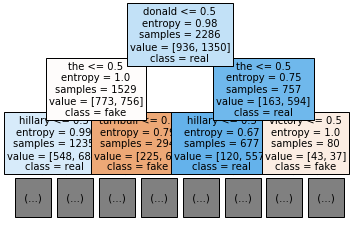

<Figure size 864x576 with 0 Axes>

In [4]:
df_train,df_test,df_validate,vectorizer=load_data()
select_model(df_train,df_validate,vectorizer)